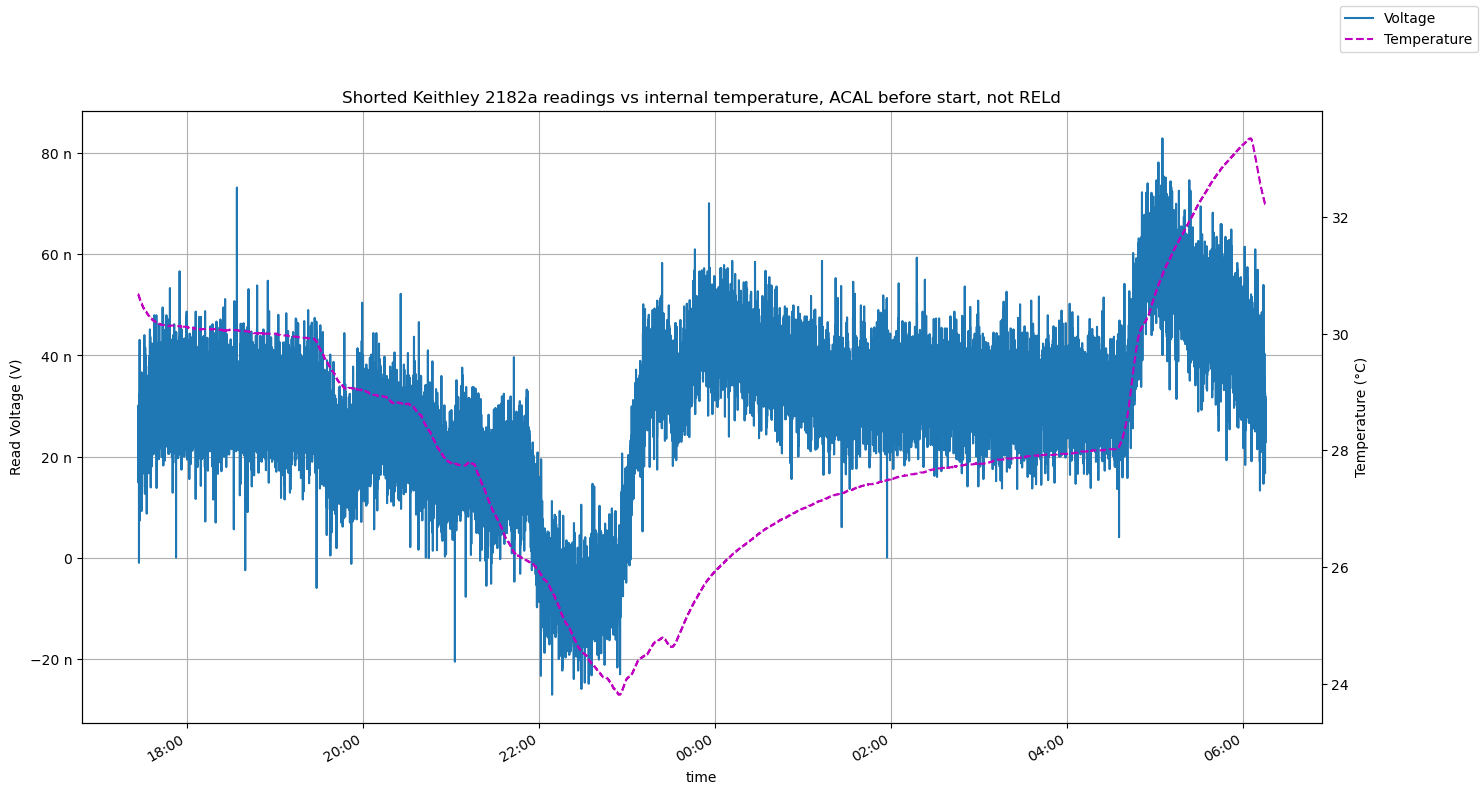

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import FormatStrFormatter

# Fetch data
columns = ["time", "2182a_volt", "TMP117_room_temp", "RTEMperature", "ACALtemp"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/keithley-2182a/main/20240503-001213_Keithley_2182a_tempco.csv", usecols=columns)

# Use datetime as index
raw["time"] = pd.to_datetime(raw["time"],unit='s')
raw = raw.set_index(pd.DatetimeIndex(raw["time"]))
raw = raw.drop('time', axis=1)

plt.rcParams["figure.figsize"] = [16, 9]
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin1.set_ylabel("Temperature (°C)")
ax.grid()
ax.set(xlabel='time', ylabel='Read Voltage (V)', title='Shorted Keithley 2182a readings vs internal temperature, ACAL before start, not RELd')

ax.plot(raw["2182a_volt"], label='Voltage')
twin1.plot(raw["RTEMperature"],'m--', label='Temperature')
ax.yaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_minor_formatter(EngFormatter())

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()

plt.show()

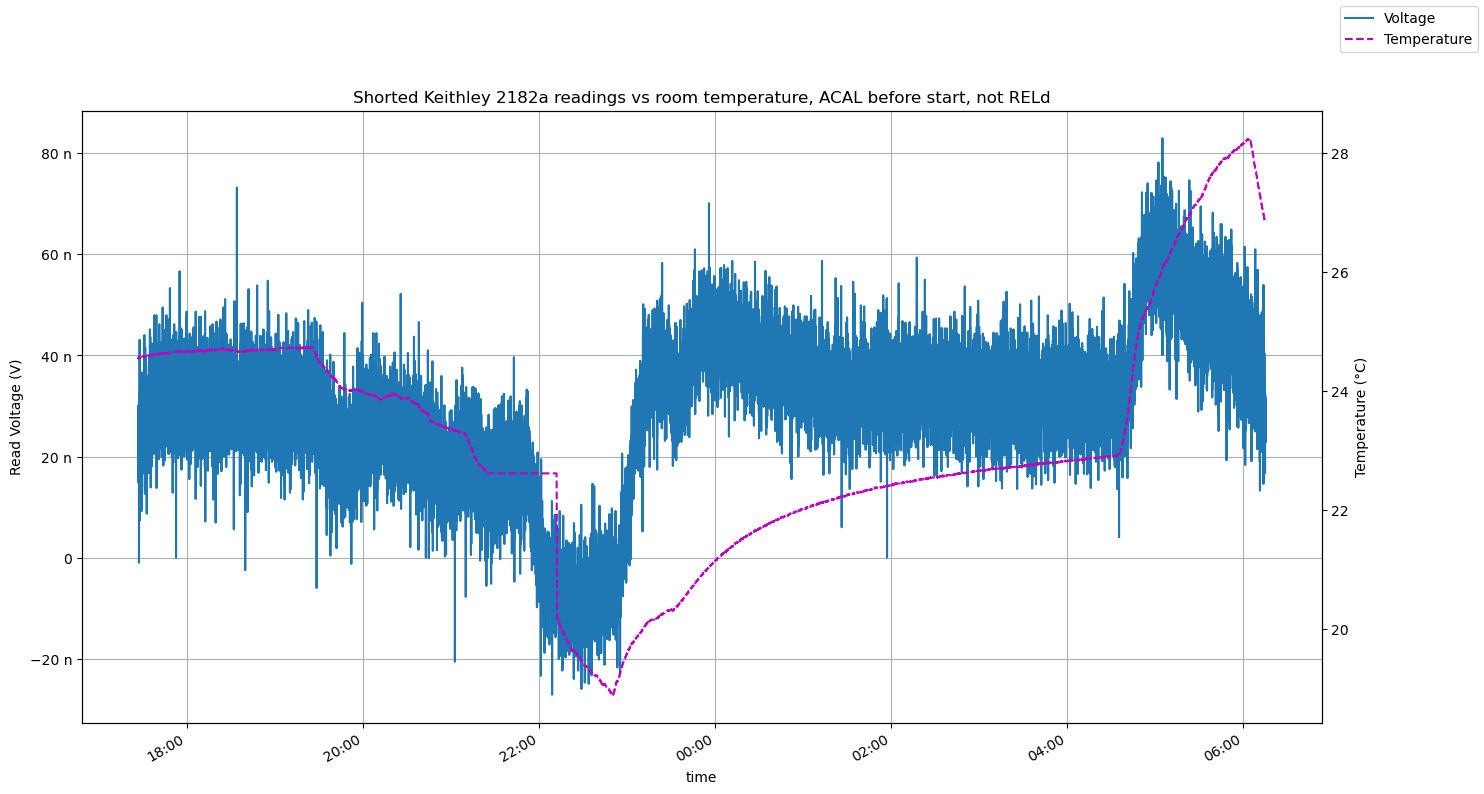

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.ticker import EngFormatter
from matplotlib.ticker import FormatStrFormatter

# Fetch data
columns = ["time", "2182a_volt", "TMP117_room_temp", "RTEMperature", "ACALtemp"]
raw=pd.read_csv("https://raw.githubusercontent.com/marcoreps/keithley-2182a/main/20240503-001213_Keithley_2182a_tempco.csv", usecols=columns)

# Use datetime as index
raw["time"] = pd.to_datetime(raw["time"],unit='s')
raw = raw.set_index(pd.DatetimeIndex(raw["time"]))
raw = raw.drop('time', axis=1)

plt.rcParams["figure.figsize"] = [16, 9]
fig, ax = plt.subplots()
twin1 = ax.twinx()
twin1.set_ylabel("Temperature (°C)")
ax.grid()
ax.set(xlabel='time', ylabel='Read Voltage (V)', title='Shorted Keithley 2182a readings vs room temperature, ACAL before start, not RELd')

ax.plot(raw["2182a_volt"], label='Voltage')
twin1.plot(raw["TMP117_room_temp"],'m--', label='Temperature')
ax.yaxis.set_major_formatter(EngFormatter())
ax.yaxis.set_minor_formatter(EngFormatter())

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels)

date_form = DateFormatter("%H:%M")
ax.xaxis.set_major_formatter(date_form)
fig.autofmt_xdate()

plt.show()